# Group 12 - Joffre Alcivar, Maria Castillo, Tiffini Meo

Final project proposal and preliminary analysis.

<u>Please put the group number and the names of all group members at the top of the Notebook.</u>

1. Clearly define a business problem that you would like to solve. The problem statement needs to spell out 1) what is the problem and who it affects, 2) financial/social implications of having a solution to the problem, 3) how the model would be used in practice, and 4) acceptable level of model performance. (10 pts.)

2. Procure a dataset. The dataset must have at least 500 records. 5000 records would be preferred. Minority class needs to be at least 10% of the data. (20 pts.)

3. Clean and pre-process the data, develop a naive Bayes classifier using TFIDF vectorization of the data. Confirm that the model has predictive value (20 pts.)

Submit a Python notebook with the analysis and the data file in csv format. Name the notebook - ProjectProposal-GroupN.ipynb.  Replace N with the group number.

Only one member of each group needs to submit the notebook.

1. Clearly define a business problem that you would like to solve. The problem statement needs to spell out 1) what is the problem and who it affects, 2) financial/social implications of having a solution to the problem, 3) how the model would be used in practice, and 4) acceptable level of model performance.

**1.   Spam text messages are becoming an increasing problem for cellphone users. We've chosen a dataset that analyzes text messages which identifies whether or not the content is spam. This information can be very valuable for a cellphone company that is looking for an algorithm to identify spam text messages before they are delivered to its intended target. By identifying these spam text messages, the cellphone company can then prevent it from being sent, or allow the receiver to block the phone number without opening the text message.**

**2.  In creating an algorithm to identify potential spam text messages, the cell phone company will then have a competitive advantage over their competitors due to its heightened level of security with text messaging. This can lead to a gain in customers making the switch to their company for security assurance.**

**3. In practice, the cell phone company would apply this algorithm any time a text message is sent. If a text is flagged as spam they can let the receiver know a potential spam text message has been sent. This would allow the receiver the option to accept the text or deny it without opening the message- avoiding any potential for data confiscation or other security liability.**

**4. An acceptable level of model performance would have high Precision and Recall scores. This is because we want our model to be as correct as possible when identifying Spam texts and be as accurate as possible as well. Due to the nature of our business case, we will sacrifice False negatives for False positives as we want to avoid Non-spam texts being labeled as Spam.** 


2. Procure a dataset. The dataset must have at least 500 records. 5000 records would be preferred. Minority class needs to be at least 10% of the data.

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
import io

ratings = pd.read_csv(io.BytesIO(uploaded['SPAM-text-message.csv']))

Saving SPAM-text-message.csv to SPAM-text-message (2).csv


In [ ]:
ratings.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
ratings.shape

(5572, 2)

In [ ]:
ratings['sentiment'] = ratings['Category'].replace({'spam':1, 'ham':0})

In [ ]:
ratings.head()

,Category,Message,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Spam message proportion:  0.13406317300789664


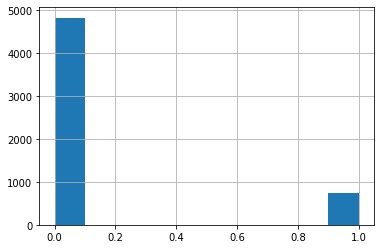

In [ ]:
ratings.sentiment.hist()

print('Spam message proportion: ', ratings.sentiment.mean())

**We determined the Spam message Category as the class of interest as we aim to limit the exposure to such messages by accurately identifying these message through our model of choice. Distribution of the class of interest is 13% of the dataset.**

3. Clean and pre-process the data, develop a naive Bayes classifier using TFIDF vectorization of the data. Confirm that the model has predictive value.

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X = ratings['Message'].values.astype(str)
y = ratings['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
nb_sent = Pipeline([
                    ('vect', CountVectorizer(lowercase=True, stop_words={'english'})),
                    ('tfidf', TfidfTransformer()),
                    ('nb', MultinomialNB()),
                    ])

nb_sent.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words={'english'})),
                ('tfidf', TfidfTransformer()), ('nb', MultinomialNB())])

In [ ]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

pred = nb_sent.predict(X_test)
pred_prob = nb_sent.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred))

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1624
           1       1.00      0.62      0.77       215

    accuracy                           0.96      1839
   macro avg       0.98      0.81      0.87      1839
weighted avg       0.96      0.96      0.95      1839

ROC AUC:  0.9803786229808683
Precision/Recall AUC:  0.7167393806037154


In [ ]:
from sklearn.naive_bayes import ComplementNB

nb_sent2 = Pipeline([
                     ('vect', CountVectorizer(lowercase=True, stop_words={'english'})),
                     ('tfidf', TfidfTransformer()),
                     ('nb', ComplementNB()),
                     ])

nb_sent2.fit(X_train, y_train)

pred2 = nb_sent2.predict(X_test)
pred_prob2 = nb_sent2.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred2))

fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_prob2)
precision2, recall2, thresholds_pr2 = precision_recall_curve(y_test, pred2)

print('AUC: ', auc(fpr2, tpr2))
print('Precision/Recall AUC: ', auc(precision2, recall2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1624
           1       0.94      0.86      0.90       215

    accuracy                           0.98      1839
   macro avg       0.96      0.92      0.94      1839
weighted avg       0.98      0.98      0.98      1839

AUC:  0.9803786229808683
Precision/Recall AUC:  0.7912189774134462


**The Complement NB model was introduced given the unbalanced dataset and gave better overall results.**